In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append(Path('../GaussianAvatars').resolve().as_posix())

import numpy as np
import torch
import json
from pathlib import Path

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)
np.random.seed(0)

### Rendering setup

In [ ]:
from aegis.splat import load_gaussians, PipelineConfig, render_single_frame
from aegis.utils import plot_single_frame
from utils.viewer_utils import OrbitCamera

In [5]:
pipeline = PipelineConfig(
    background_color=[1., 1., 1.]
)

W: int = 960
H: int = 540
radius: float = 1
fovy: float = 20

root_cam = OrbitCamera(W, H, r=radius, fovy=fovy, convention='opencv')

In [11]:
from glob import glob

DATASET_PATH = Path("../datasets/NeRSembleReconst")

avatars = glob(f"{DATASET_PATH}/avatars/*/point_cloud.ply")
len(avatars)

10

Rendering avatar: 302


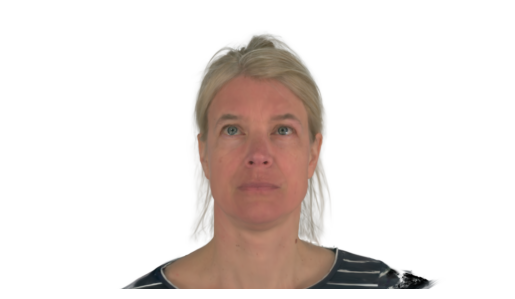

Rendering avatar: 460


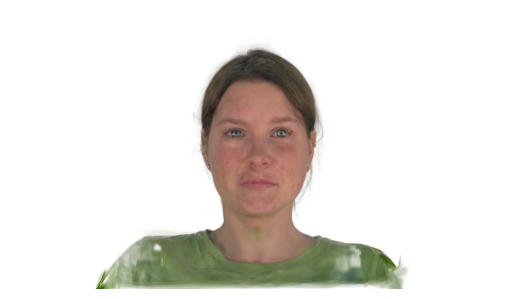

Rendering avatar: 140


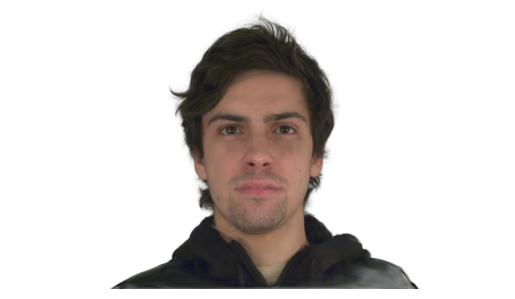

Rendering avatar: 074


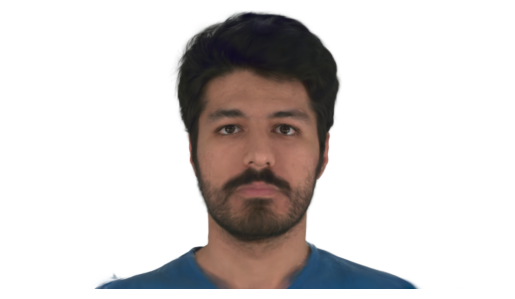

Rendering avatar: 218


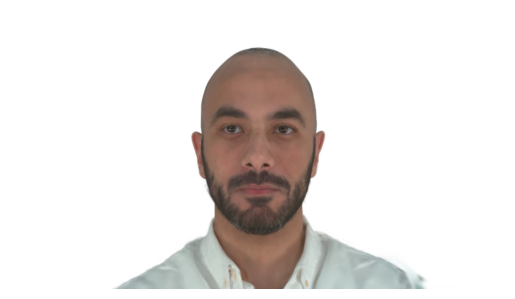

Rendering avatar: 306


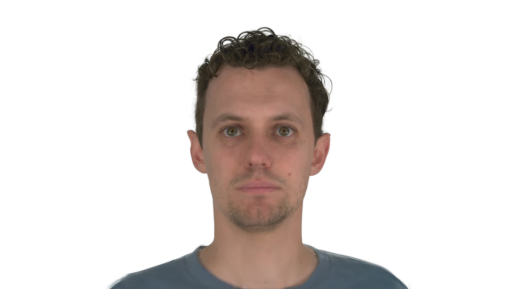

Rendering avatar: 264


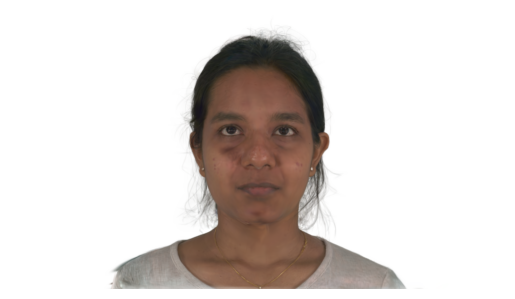

Rendering avatar: 304


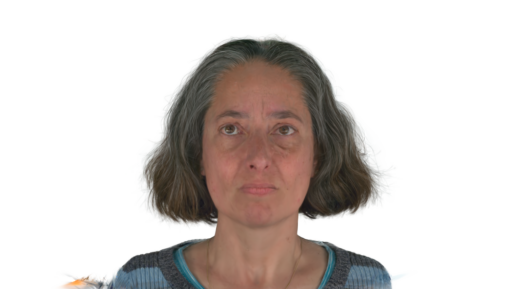

Rendering avatar: 253


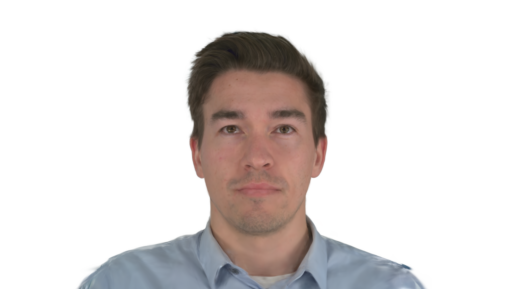

Rendering avatar: 104


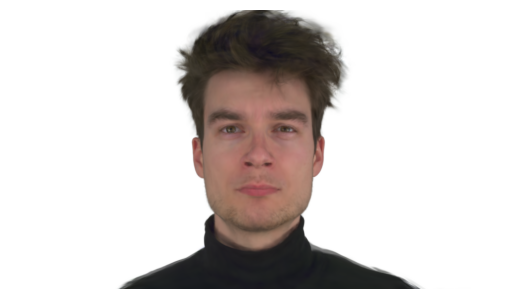

In [8]:
renders = []

for avatar in avatars:
    avatar_id = avatar.split('/')[-2]
    print(f"Rendering avatar: {avatar_id}")
    
    gaussians, _ = load_gaussians(Path(avatar))

    rgb = render_single_frame(gaussians, root_cam, pipeline)
    plot_single_frame(rgb)
    
    renders.append((avatar_id, rgb))

In [13]:
from PIL import Image

for avatar_id, rgb in renders:
    out_path = Path(f"{DATASET_PATH}/renders/{avatar_id}.png")
    print(f"Saving render to: {out_path}")
    rgb_img = (np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255).astype(np.uint8)
    Image.fromarray(rgb_img).save(out_path)

Saving render to: ../datasets/NeRSembleReconst/renders/302.png
Saving render to: ../datasets/NeRSembleReconst/renders/460.png
Saving render to: ../datasets/NeRSembleReconst/renders/140.png
Saving render to: ../datasets/NeRSembleReconst/renders/074.png
Saving render to: ../datasets/NeRSembleReconst/renders/218.png
Saving render to: ../datasets/NeRSembleReconst/renders/306.png
Saving render to: ../datasets/NeRSembleReconst/renders/264.png
Saving render to: ../datasets/NeRSembleReconst/renders/304.png
Saving render to: ../datasets/NeRSembleReconst/renders/253.png
Saving render to: ../datasets/NeRSembleReconst/renders/104.png
